In [1]:
from ias.Datasets import Emnist
from ias.DecisionTrees.NaiveDecisionTree import NaiveDecisionTree
from ias.Metrics import accuracy_score, confusion_matrix, show_confusion_matrix
from ias.PCA import PCA

In [2]:
import numpy as np

In [17]:
indices = np.arange(len(Emnist.attributes))
np.random.shuffle(indices)
train_size = int(10000)

train_i = indices[:train_size]
train_x = Emnist.attributes[train_i]
train_y = Emnist.labels[train_i]

test_i = indices[train_size:]
test_x = Emnist.attributes[test_i]
test_y = Emnist.labels[test_i]

In [18]:
pca = PCA(0.90)
pca.fit(train_x)

In [6]:
compressed_train_x = pca.compress(train_x)

In [22]:
tree = NaiveDecisionTree(max_depth=10)
tree.fit(compressed_train_x, train_y)

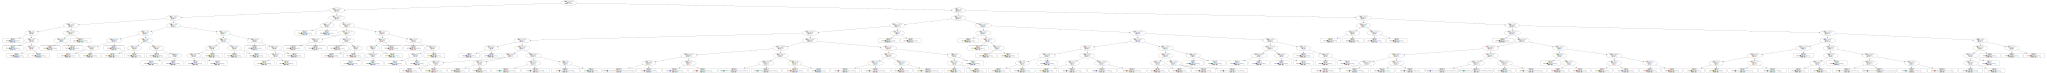

In [23]:
d = tree.show(class_name=Emnist.class_names)
d.render("pouet")
d

0.0996

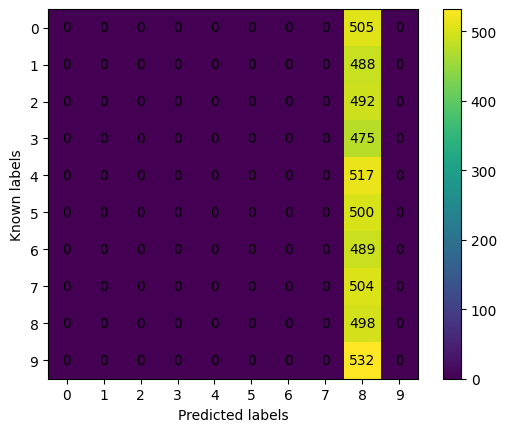

In [25]:
show_confusion_matrix(confusion_matrix(Emnist.class_number, test_y[:5000], tree.predict(test_x[:5000])), Emnist.class_names)
accuracy_score(test_y[:5000], tree.predict(test_x[:5000]))

0.0986

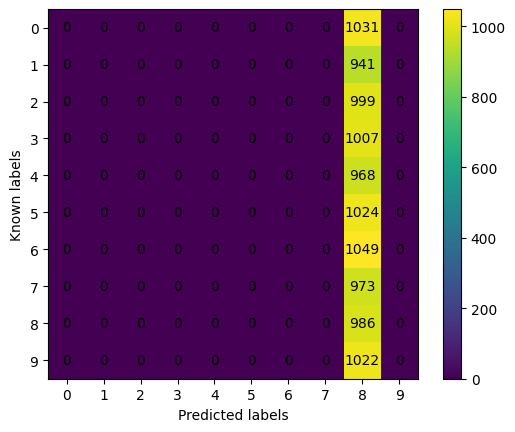

In [27]:
show_confusion_matrix(confusion_matrix(Emnist.class_number, train_y, tree.predict(train_x)), Emnist.class_names)
accuracy_score(train_y, tree.predict(train_x))